In [9]:
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import yfinance as yf
yf.pdr_override()

In [10]:
np.random.seed(123)
start = '2021-01-01'
end = '2023-12-31'

sbi = yf.download("SBIN.NS", start= start, end = end)['Adj Close']

risk_free = 0.1/252
# risk_free = yf.download("ITC.NS", start=start, end=end)['Adj Close']

nifty = yf.download("^BSESN", start=start, end=end)['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
sbi = sbi.pct_change().dropna()
# risk_free = risk_free.pct_change().dropna()
nifty = nifty.pct_change().dropna()


aligned_data = pd.concat([sbi, nifty], axis=1).dropna()

sbi_prc = aligned_data.iloc[:, 0]
# risk_free_prc = aligned_data.iloc[:, 1]
nifty_prc = aligned_data.iloc[:, 1]



In [12]:

beta = regression.linear_model.OLS(sbi_prc - risk_free, sm.add_constant(nifty_prc-risk_free)).fit()
beta = beta.params[1]

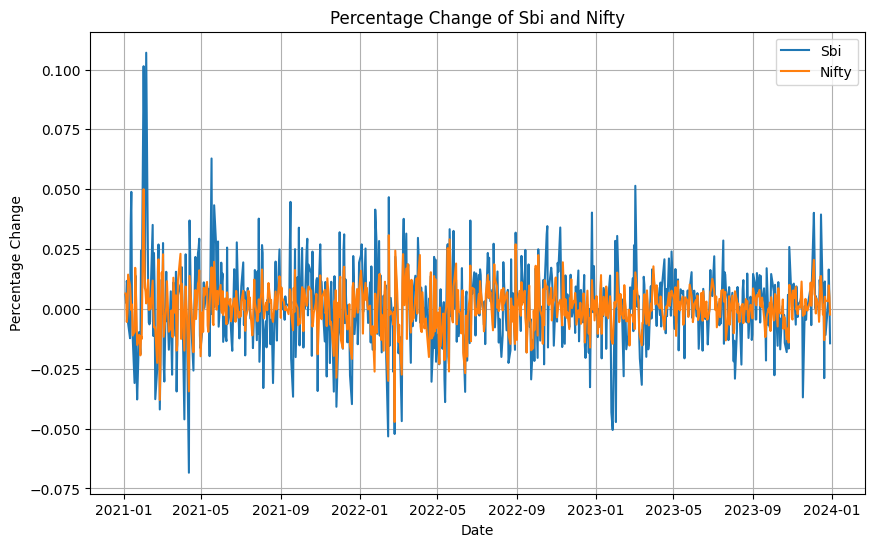

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(sbi_prc, label='Sbi')
# plt.plot(risk_free_prc, label='Risk Free')
plt.plot(nifty_prc, label='Nifty')

plt.title('Percentage Change of Sbi and Nifty')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()  # Show the legend
plt.grid(True)
plt.show()

Text(0, 0.5, 'Percent Return')

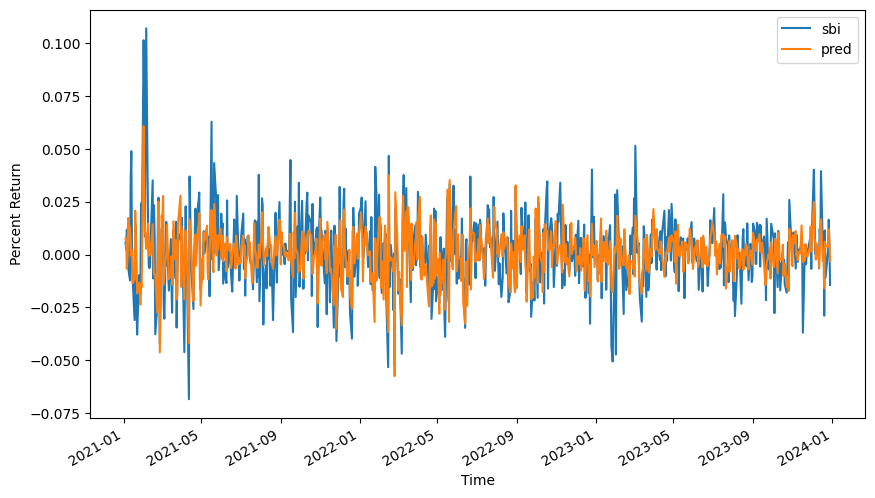

In [14]:
predictions = risk_free + beta*(nifty_prc - risk_free)
plt.figure(figsize=(10, 6))
plt.plot(sbi_prc, label='Sbi')

predictions.plot()
plt.legend(['sbi','pred'])

plt.xlabel('Time')
plt.ylabel('Percent Return')

In [15]:
print("beta", beta)

beta 1.2155564286846423


Enter the stock ticker: RELIANCE.NS
Enter the market proxy ticker: ^BSESN
Enter the risk-free rate (in decimal form): 0.07436
Enter the start date (YYYY-MM-DD): 2022-01-01
Enter the end date (YYYY-MM-DD): 2023-12-31


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


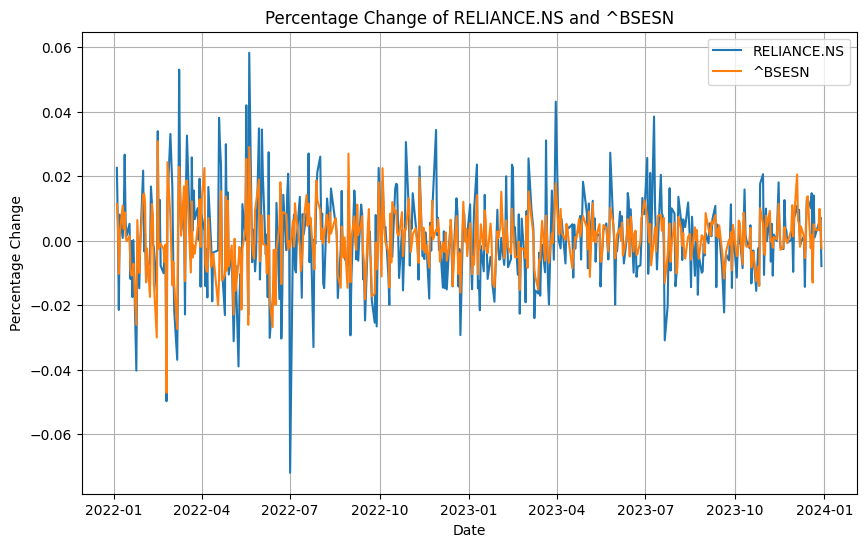

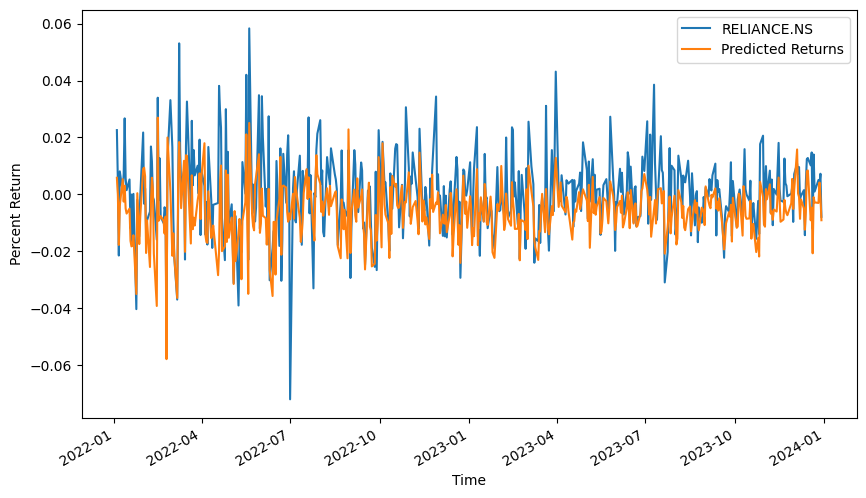

Beta: 1.087986370981581


In [18]:
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf
yf.pdr_override()


stock_ticker = input("Enter the stock ticker: ")
market_proxy_ticker = input("Enter the market proxy ticker: ")
risk_free_rate = float(input("Enter the risk-free rate (in decimal form): "))
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")


stock = yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']
market_proxy = yf.download(market_proxy_ticker, start=start_date, end=end_date)['Adj Close']

stock_returns = stock.pct_change().dropna()
market_proxy_returns = market_proxy.pct_change().dropna()


aligned_data = pd.concat([stock_returns, market_proxy_returns], axis=1).dropna()
stock_returns = aligned_data.iloc[:, 0]
market_proxy_returns = aligned_data.iloc[:, 1]


beta = regression.linear_model.OLS(stock_returns - risk_free_rate, sm.add_constant(market_proxy_returns - risk_free_rate)).fit()
beta = beta.params[1]


plt.figure(figsize=(10, 6))
plt.plot(stock_returns, label=stock_ticker)
plt.plot(market_proxy_returns, label=market_proxy_ticker)
plt.title(f'Percentage Change of {stock_ticker} and {market_proxy_ticker}')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()


predictions = risk_free_rate + beta * (market_proxy_returns - risk_free_rate)


plt.figure(figsize=(10, 6))
plt.plot(stock_returns, label=stock_ticker)
predictions.plot(label='Predicted Returns')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Percent Return')
plt.show()

# Print beta
print(f"Beta: {beta}")